# Image Processing with CV2
In this notebook, we'll be demonstrating how to perform different kinds of image processing using the OpenCV (`cv2`) Python library.

## Notebook Setup
Throughout this notebook, we will be using the following Python libraries:

- `cv2`: Originally created by IBM and written in C, `cv2` here is a Python wrapper that allows us to interact with this OpenCV library to perform a wide variety of computer vision functionalities.
- `numpy`: When we work with an image in `cv2`, the image is comprised of arrays of numbers that represent color channels associated to pixel values. As we perform operations on these image arrays, we will use the computationally efficient `numpy` library to interact wtih our images in various ways.
- `matplotlib`: This is the general purpose data visualization library in Python. We will specifically using `matplotlib` in this context to display images onto our screen.

At the end of the next cell, you will also notice a line that contains `%matplotlib inline`. This is known as a Jupyter magic command, and it is used to render visualizations created by `matplotlib` directly within the Jupyter notebook. Technically speaking, I believe that newer versions of Jupyter no longer require this line to be instantiated like this, but I'm including it just in case.

In [1]:
# Importing the necessary Python library
import cv2
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

## Reading In, Displaying, and Changing the Color of Images
In this first section, we'll load in our empty parking lot image from it's respective JPEG file. You can find this image in our Git repo at `/data/raw/empty_parking_lot.jpeg`. Now, the curious thing about `cv2` is that it defaults to reading in the order of images' color channels as a "Blue, Green, Red" (BGR), whereas most computers prefer to order the color channels as "Red, Green, Blue" (RGB). In fact, `matplotlib` will not display the image properly at first as it defaults to displaying images in an RGB format. We'll show how to import the image with `cv2`, show what that image looks like in that native BGR format, then we'll convert it to the correct RGB and view it again.

In [2]:
# Reading in the image from file
img = cv2.imread('../data/raw/empty_parking_lot.jpeg')

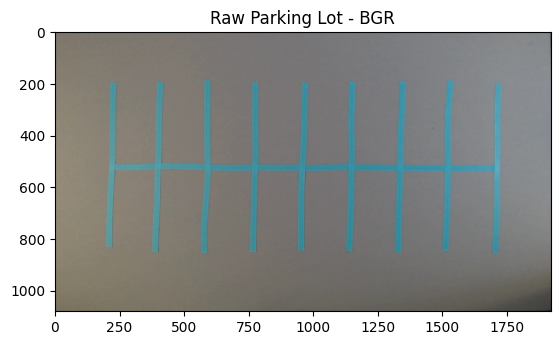

In [3]:
# Displaying the BGR image before converting it to RGB
plt.title('Raw Parking Lot - BGR')
plt.imshow(img);

Notice how the parking lot lines are clearly incorrectly colored? This is because `matplotlib` is attempting to display this image as RGB when the current color channel ordering is BGR. Now let's change the color channel ordering and display the image again!

In [4]:
# Changing the default color channels of the image from BGR to RGB
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

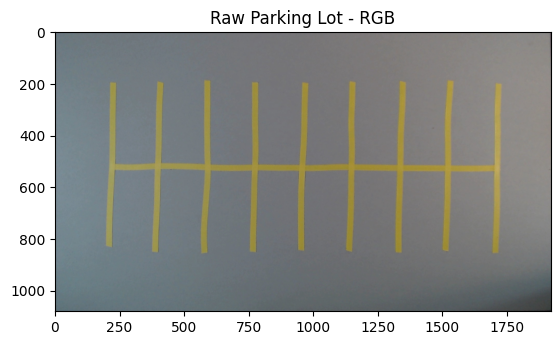

In [5]:
# Displaying the RGB image with the use of matplotlib
plt.title('Raw Parking Lot - RGB')
plt.imshow(img);

Much better! Now before moving onto the next section, I want to show you one more color tranformation. It's often common to change color images to a grayscale, and we can do that very similarly to how we perform the BGR to RGB tranformation above. Let's do that in the cells below.

You'll notice an interesting thing actually happens when we try to display the grayscale image with `matplotlib`. `matplotlib` actually defaults to displaying grayscale images with a **viridis** color mapping, so instead of looking gray like you'd expect, viridis covers this spectrum that's more like violet to yellow. Our image in particular shows up very greenish. In order to fix this, we'll have to pass in a `cmap` parameter to `matplotlib` that renders the grayscale image correctly. (If you want to learn more about `matplotlib`'s color references like viridis, check out [this link](https://matplotlib.org/stable/gallery/color/colormap_reference.html)).

In [6]:
# Converting the RGB image to a grayscale image
gray_img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

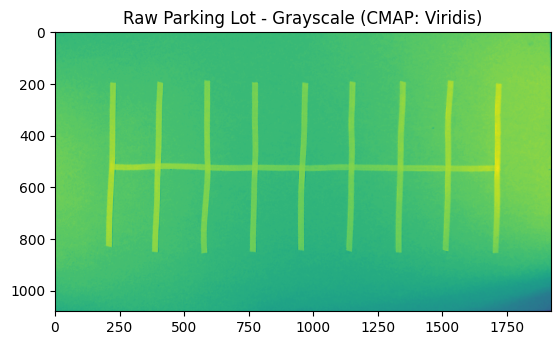

In [7]:
# Displaying the grayscale image without setting the CMAP
plt.title('Raw Parking Lot - Grayscale (CMAP: Viridis)')
plt.imshow(gray_img);

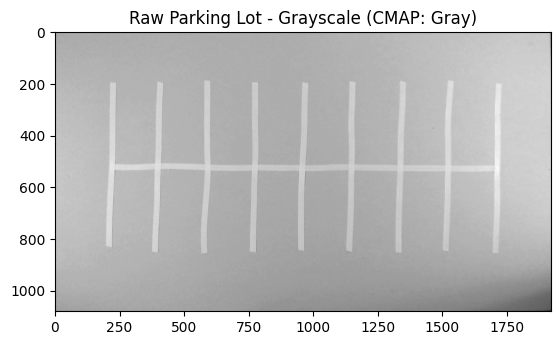

In [8]:
# Displaying the grayscale image setting the CMAP
plt.title('Raw Parking Lot - Grayscale (CMAP: Gray)')
plt.imshow(gray_img, cmap = 'gray');

## Image Thresholding
Keeping in mind that RGB stores colors as 256 distinct values (indexed at 0, the max is technically 255), it's possible to perform some different kinds of thresholding to display polarized values. This is particularly effective on grayscale images. There are several different kinds of thresholding that OpenCV offers, and if you'd like to review them all, check out [this link here](https://opencv24-python-tutorials.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_thresholding/py_thresholding.html).

In the cell below, we'll be showing how to perform a binary threshold. By setting a specific value (which we will set to be an arbitrary 125), all pixels below the thresholded value will turn white while all pixels above the thresholded value will turn black. 

In [9]:
# Performing a binary threshold on the grayscale image
thresh_cutoff, thresh_img = cv2.threshold(gray_img,
                                          thresh = 125,
                                          maxval = 255,
                                          type = cv2.THRESH_BINARY)

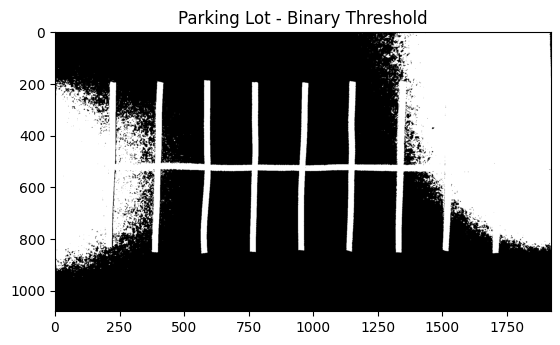

In [10]:
# Displaying the thresholded image
plt.title('Parking Lot - Binary Threshold')
plt.imshow(thresh_img, cmap = 'gray');

Notice that the results of this thresholding didn't do a great job of separating the parking lot lines from the background. This is because there is just enough odd shading on the corners of the parking lot image that trying to do a simple binary threshold isn't going to work super well for our purposes.

That said, let's try a different form of thresholding on the image called an **adaptive thresholding**. The adaptive threshold takes in some new parameters, including the following:

- `adaptiveMethod`: This is the particular method that will be used to calculate the adaptive threshold value. The `ADAPTIVE_THRESH_MEAN_C` specifically looks for the threshold value as the mean of the neighborhood area.
- `blockSize`: This determines the size of the neighborhood area. (This always needs to bee an odd integer.)
- `C`: This is a constant value that gets subtracted from the calculated mean.

Let's show how that works in the cells below.

In [11]:
# Performing an adaptive threshold on the grayscale img
adaptive_thresh_img = cv2.adaptiveThreshold(gray_img,
                                            maxValue = 255,
                                            adaptiveMethod = cv2.ADAPTIVE_THRESH_MEAN_C,
                                            thresholdType = cv2.THRESH_BINARY,
                                            blockSize = 11,
                                            C = 5)

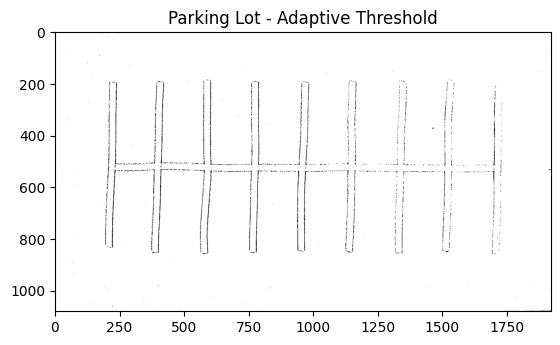

In [12]:
# Displaying the adaptive thresholded image
plt.title('Parking Lot - Adaptive Threshold')
plt.imshow(adaptive_thresh_img, cmap = 'gray');

The adaptive threshold does a lot better of segmenting the parking lot lines from the background, but it's still not perfect. I personally wouldn't recommend trying to segment an image like this using neither binary thresholding nor adaptive thresholding. Instead, we'll learn in a different notebook how to perform another kind of segmentation that will produce better results than what we've seen here!

## Morphological Operators
In this section, we'll show how we can make more granular enhancements to an image with what are known as **morphological operators.** These use kernels to iterate over an image to essentially do things like erode features of an image or reduce noise in some capacity. In the cells below, we're going to cover three different types of morphological operations, although note that OpenCV offers more than what I'm going to show. The three we are going to cover include:

- **Erosion**: This uses a kernel that passes over the image to try to reduce specific features of a given image by eroding them away.
- **Background Noise Reduction**: Using a special OpenCV function called `morphologicalEx` along with "morphological opening" (`cv2.MORPH_OPEN`) option, this seeks to reduce the noise that may typically be found in the background of an image.
- **Foreground Noise Reduction**: Very similar to the operator above, this is using the sam OpenCV function `morphologicalEx` but with an alternative"morphological closing" (`cv2.MORPH_CLOSE`) option, this seeks to reduce the noise that may typically be found in the foreground of an image.
- **Simple Edge Detection**: While we will be demonstrating more sophisticated ways of performing edge detection in other notebooks, it is possible to perform a crude edge detection with the same `morphologicalEx` function we used above.

In [13]:
# Creating a custom kernel using Numpy's "ones" function
kernel = np.ones((7, 7), dtype = np.uint8)

In [14]:
# Generating the eroded image
eroded_img = cv2.erode(img,
                       kernel = kernel,
                       iterations = 1)

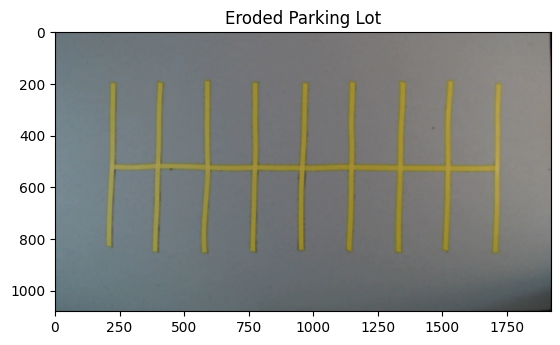

In [15]:
# Displaying the eroded image
plt.title('Eroded Parking Lot')
plt.imshow(eroded_img);

In [16]:
# Performing a noise reduction on the background with a morphological opening
noise_reduced_bg_img = cv2.morphologyEx(img,
                                        op = cv2.MORPH_OPEN,
                                        kernel = kernel)

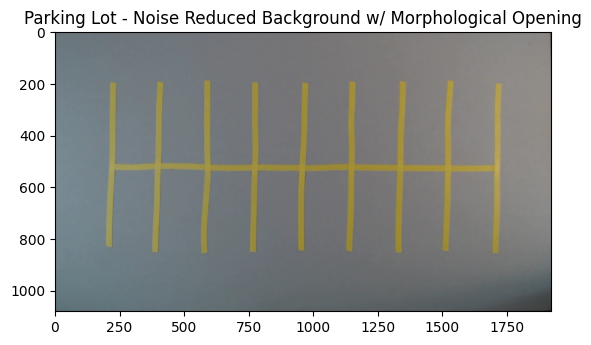

In [17]:
# Displaying the noise reduced background image
plt.title('Parking Lot - Noise Reduced Background w/ Morphological Opening')
plt.imshow(noise_reduced_bg_img);

In [18]:
# Performing a noise reduction on the foreground with a morphological closing
noise_reduced_fg_img = cv2.morphologyEx(img,
                                        op = cv2.MORPH_CLOSE,
                                        kernel = kernel)

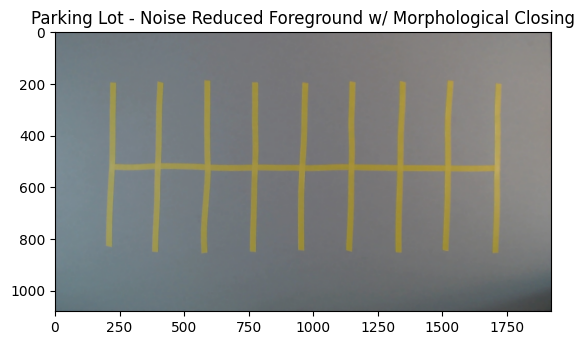

In [19]:
# Displaying the noise reduced foreground image
plt.title('Parking Lot - Noise Reduced Foreground w/ Morphological Closing')
plt.imshow(noise_reduced_fg_img);

In [20]:
# Performing a noise reduction on the foreground with a morphological closing
crude_edged_img = cv2.morphologyEx(img,
                                   op = cv2.MORPH_GRADIENT,
                                   kernel = kernel)

# Inverting the crude_edged_img to view better
crude_edged_img = cv2.bitwise_not(crude_edged_img)

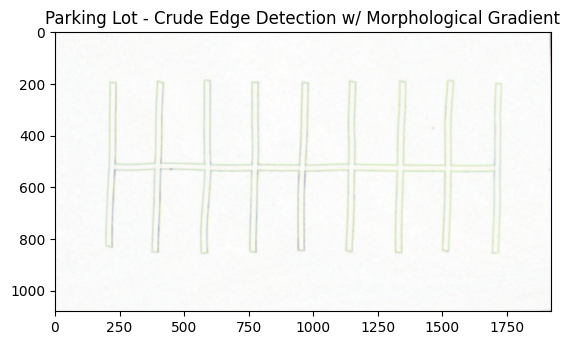

In [21]:
# Displaying the noise reduced foreground image
plt.title('Parking Lot - Crude Edge Detection w/ Morphological Gradient')
plt.imshow(crude_edged_img);

## Color Histograms and Color Equalization
Given that all images have three color channels associated to them (red, blue, green), we can plot these color distributions onto a **histogram**, which represents how many of each color value we see in this image. Now, because our image is essentially yellow lines on a gray background, when we visualize our color histogram, we should see a lot of colors clustered around one set of points.

In addition to simply viewing the color histogram, we can also take things a step further by applying **color equalization**. This essentially attempts to level out spikes where clusters of color gather together, which creates a much higher contrast in the image.

Let's start with viewing the color histogram of our raw parking lot image.

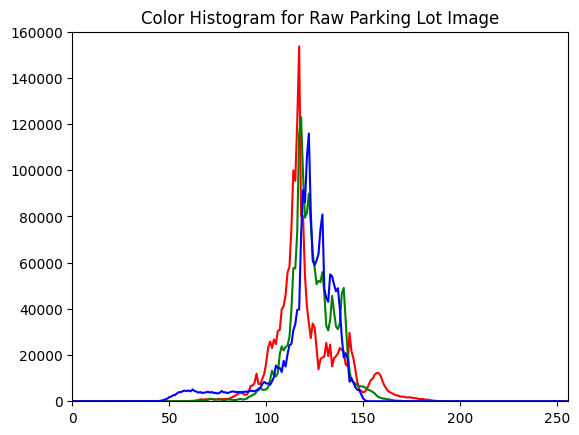

In [22]:
# Defining the color channels we'll be iterating through
colors = ('r', 'g', 'b')

# Setting the title for the color histogram
plt.title('Color Histogram for Raw Parking Lot Image')

# Iterating through each color channel to display the histogram
for i, color in enumerate(colors):
    hist_values = cv2.calcHist([img], channels = [i], mask = None,
                               histSize = [256], ranges = [0, 256])
    plt.plot(hist_values, color = color)
    plt.xlim([0, 256])
    plt.ylim([0, 160000])

As expected, we can see that our raw parking lot image has a lot of its colors clustered around the center. Now, let's perform a color equalization to see how this changes our results. In order to apply a color equalization with `cv2`, we need to change our current color format from RGB to **HSV**. Standing for "hue, saturation, value", this is a way to represent color that is generally more true to the human eye. I am an amateur graphic designer, and I can tell you that if you create a piece of graphic art in Adobe Illustrator or Affinity Designer that you intend to print out on something like piece of paper, you would aim to save your graphic art in an HSV format!

In [23]:
# Converting our raw parking lot image from its current RGB to HSV
hsv_img = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)

# Applying the color equalization to the HSV image
hsv_img[:, :, 2] = cv2.equalizeHist(hsv_img[:, :, 2])

# Converting the image from HSV to RGB for display purposes
equalized_img = cv2.cvtColor(hsv_img, cv2.COLOR_HSV2RGB)

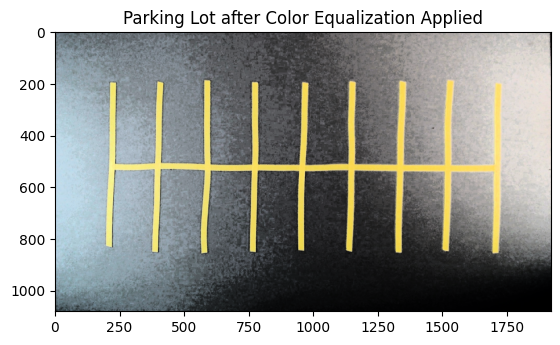

In [24]:
# Displaying the color equalized image
plt.title('Parking Lot after Color Equalization Applied')
plt.imshow(equalized_img);

Looks a lot different now! The yellow lines now pop out quite a bit more, and you can actually pretty clearly see the color sources that were reflected on my model parking lot when I took this raw image with my webcam. (On either side of my webcam sits two lamps. 😃) To see what happened "behind the scenes" with `cv2`'s implementation of color equalization, let's check out what the color histogram looks like now.

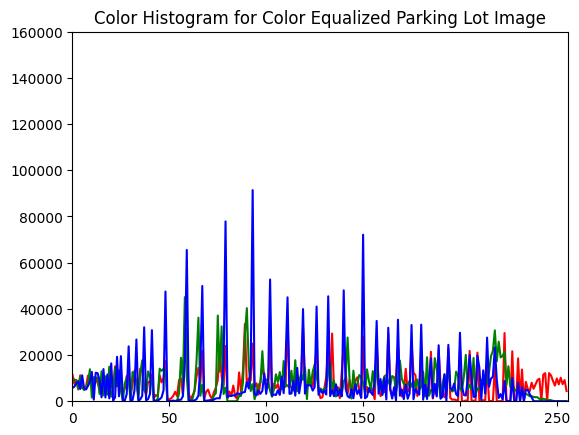

In [25]:
# Defining the color channels we'll be iterating through
colors = ('r', 'g', 'b')

# Setting the title for the color histogram
plt.title('Color Histogram for Color Equalized Parking Lot Image')

# Iterating through each color channel to display the histogram
for i, color in enumerate(colors):
    hist_values = cv2.calcHist([equalized_img], channels = [i], mask = None,
                               histSize = [256], ranges = [0, 256])
    plt.plot(hist_values, color = color)
    plt.xlim([0, 256])
    plt.ylim([0, 160000])

While it can be a little difficult to read, I intentionally set the y-limit scale to be the same as the raw image's color histogram to drive the point home that, yes, this function really did flatten out the color histogram. This odd spikiness is pretty common behavior of the color equalization function, so don't worry if you experience the same with your own images.

## Drawing Text & Shapes Onto Images
Okay, we're on the home stretch now! I saved the most fun for last. In this last section, we'll cover how to draw a few simple shapes and place text on top of an image with `cv2`. A strong word of caution here: when applying ANY changes on top of an image with `cv2`, they are considered **destructive** changes. What this means is that once you do something, there's no inherent way to undo what you did. Again, this is because the images are loaded as arrays of numbers, so when we do things like add text or shapes, we are directly manipulating the arrays numbers that comprise overall image. So my advice: make copies of your images (as I have been doing throughout this whole notebook) so you don't accidentally destroy your "master" image!

Because I don't necessarily care to save it, I'm actually going to apply what we're going to do in this section to the equalized image we produced in the previous section.

The key everything we're going to be doing here is placement, which is essentially reliant on x- and y-coordinate values. For example, when we draw our first shape (rectangle), it will ask us for `pt1` (representing the top left corner) and `pt2` (representing the bottom right corner), which are simply x- and y-coordinates of where we want these points to be.

### Rectangle
Let's go ahead and draw our first shape onto the equalized image: a rectangle. As alluded to above, a rectangle is pretty easy to draw. All you have to do is give the top left and bottom right corners as `pt1` and `pt2` for the location of the rectangle. Notice also we pass in the `color` parameter a tuple that represents RGB colors. In this case, `(0, 0, 255)` is translated to no red, no green, and full blast blue. That means our rectangle will be blue! Finally, we can set a `thickness` parameter by passing whatever integer value we desire.

Again, because this is a destructive change, you'll notice that when we apply this function to the equalized image (`equalized_img`), we're not saving it back to a new variable. These changes are being directly applied on top of the existing image, and there's no point of return after you apply a change like this. Be careful with what you do!

In [26]:
# Drawing a rectangle on our equalized blank image
cv2.rectangle(equalized_img, pt1 = (250, 400),
              pt2 = (500, 600), color = (0, 0, 255),
              thickness = 10)

array([[[  0,   0,   1],
        [  6,   6,   9],
        [ 83,  86, 102],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[  0,   0,   1],
        [ 13,  13,  18],
        [103, 106, 126],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[  0,   0,   1],
        [ 37,  37,  48],
        [124, 128, 150],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       ...,

       [[ 33,  38,  41],
        [ 33,  38,  41],
        [ 33,  38,  41],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[ 33,  38,  41],
        [ 33,  38,  41],
        [ 33,  38,  41],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[ 33,  38,  41],
        [ 33,  38,  41],
        [ 33,  38,  41],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]]

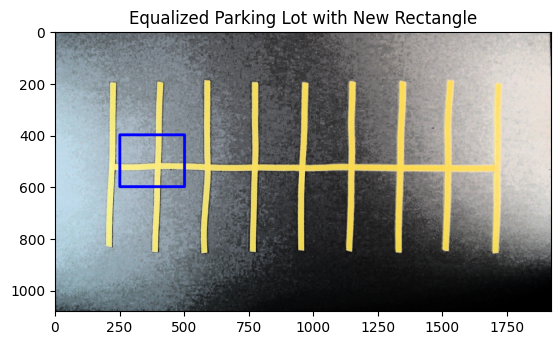

In [27]:
# Displaying our equalized image with new rectangle
plt.title('Equalized Parking Lot with New Rectangle')
plt.imshow(equalized_img);

### Circle
Drawing a circle is very similar how we drew the rectangle. Obviously, the nature of a circle is different from a rectangle, so instead of passing in two points representing the corners of the rectangle, we're going to pass in the **center** of the circle and how large we want the circle to be in terms of its **radius**. One other thing I neglected to mention above is that it's totally possible to have a shape filled in rather than be an outline. In order to do that, we simply need to set the `thickness` parameter to be `-1`.

In [28]:
# Drawing a circle on our equalized image
cv2.circle(equalized_img, center = (1300, 200),
           radius = 100, color = (0, 255, 0),
           thickness = -1)

array([[[  0,   0,   1],
        [  6,   6,   9],
        [ 83,  86, 102],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[  0,   0,   1],
        [ 13,  13,  18],
        [103, 106, 126],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[  0,   0,   1],
        [ 37,  37,  48],
        [124, 128, 150],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       ...,

       [[ 33,  38,  41],
        [ 33,  38,  41],
        [ 33,  38,  41],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[ 33,  38,  41],
        [ 33,  38,  41],
        [ 33,  38,  41],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[ 33,  38,  41],
        [ 33,  38,  41],
        [ 33,  38,  41],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]]

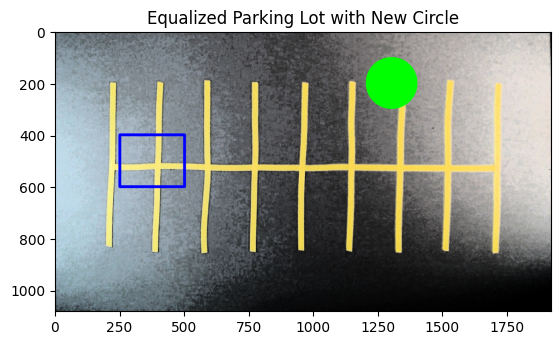

In [29]:
# Displaying our equalized image with new circle
plt.title('Equalized Parking Lot with New Circle')
plt.imshow(equalized_img);

### Line
For our final shape, let's show how to add a line. This is very, very similar to how we drew the rectangle, so I'm not going to bother talking about that too much. I want to draw a purple line, and in order to do this, I'm going to have to bring in my preschooler to refresh us. 😂 What two colors make purple? Yup, it's red and blue! In order to produce this purple color then, we'll pass into the `color` parameter a tuple that looks like this: `(255, 0, 255)`.

In [39]:
# Drawing a line on our equalized image
cv2.line(equalized_img, pt1 = (750, 800), pt2 = (1500, 500),
         color = (255, 0, 255), thickness = 10)

array([[[  0,   0,   1],
        [  6,   6,   9],
        [ 83,  86, 102],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[  0,   0,   1],
        [ 13,  13,  18],
        [103, 106, 126],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[  0,   0,   1],
        [ 37,  37,  48],
        [124, 128, 150],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       ...,

       [[ 33,  38,  41],
        [ 33,  38,  41],
        [ 33,  38,  41],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[ 33,  38,  41],
        [ 33,  38,  41],
        [ 33,  38,  41],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[ 33,  38,  41],
        [ 33,  38,  41],
        [ 33,  38,  41],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]]

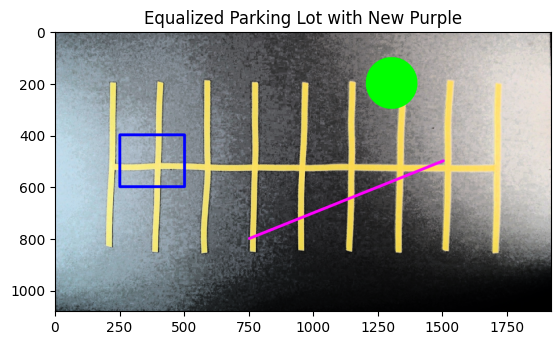

In [40]:
# Displaying our equalized image with new rectangle
plt.title('Equalized Parking Lot with New Purple')
plt.imshow(equalized_img);

### Text
We're going to keep it at rectangles, circles, and lines since that's all we're going to need to complete the remainder of our project. Note that `cv2` can do more than just this, but we're going to leave it at that for now and move on to our final piece of this notebook: adding text! The only real disappointing thing (at least, it is for me as a graphic designer 😂) is that `cv2` only allows you to select from a very limited selection of basic font choices. The only thing to keep in mind here with placement on the image is that the x, y-coordinates that we pass in represent the bottom left corner of the text string on the image.

In [57]:
# Adding text to our equalized image
cv2.putText(equalized_img, text = 'My CV2 Text', org = (850, 1000),
            fontFace = cv2.FONT_HERSHEY_SIMPLEX, fontScale = 5,
            color = (255, 0, 0), thickness = 10)

array([[[  0,   0,   1],
        [  6,   6,   9],
        [ 83,  86, 102],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[  0,   0,   1],
        [ 13,  13,  18],
        [103, 106, 126],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[  0,   0,   1],
        [ 37,  37,  48],
        [124, 128, 150],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       ...,

       [[ 33,  38,  41],
        [ 33,  38,  41],
        [ 33,  38,  41],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[ 33,  38,  41],
        [ 33,  38,  41],
        [ 33,  38,  41],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[ 33,  38,  41],
        [ 33,  38,  41],
        [ 33,  38,  41],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]]

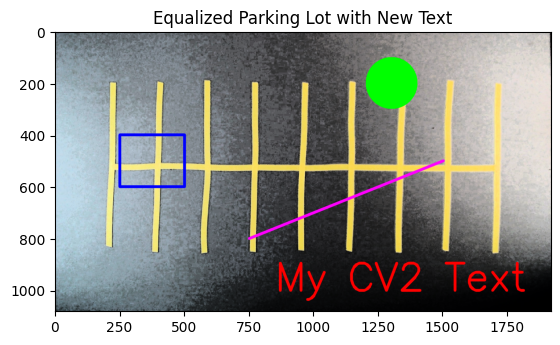

In [58]:
# Displaying our equalized image with new rectangle
plt.title('Equalized Parking Lot with New Text')
plt.imshow(equalized_img);

## Saving Images
That brings us to the end of our notebook! Hope you all found learned some new stuff when it comes to image processing. For the final cell of our notebook, I'm going to show you how to save an image back to a file after you're done using it. I'm going to take the same equalized image and save it back into our Git repo in the following filepath: `/data/processed/processed_empty_parking_lot.jpeg`. Note that the equalized image we've been working with is in the current RGB format, and in order to save this image back to file properly with `cv2`, we're going to need to make one final conversion back to BGR.

In [59]:
# Saving the post-processed, equalized image back to the Git repo
cv2.imwrite('../data/processed/processed_empty_parking_lot.jpeg', equalized_img)

True